In [1]:
# Imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# for easier reading np
np.set_printoptions(precision=3,suppress=True)

In [2]:
with open('../../Datasets/normalized_heart_slimmed.csv') as f:
    temp = np.loadtxt(f, delimiter=',', skiprows=1)
X = temp[:,:-1]
y = temp[:,-1]
from sklearn.preprocessing import OneHotEncoder
drop_enc = OneHotEncoder()
y = drop_enc.fit_transform(y.reshape(-1, 1)).toarray()

feats_train, feats_test, Y_train, Y_test = train_test_split(X, y,train_size=0.7,random_state=42)


In [3]:
feats_train.shape,Y_train.shape

((212, 9), (212, 2))

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                150       
                                                                 
 dense_1 (Dense)             (None, 24)                384       
                                                                 
 dense_2 (Dense)             (None, 15)                375       
                                                                 
 dense_3 (Dense)             (None, 2)                 32        
                                                                 
Total params: 941
Trainable params: 941
Non-trainable params: 0
_________________________________________________________________


2022-12-11 15:23:27.536558: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-11 15:23:27.537237: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


None


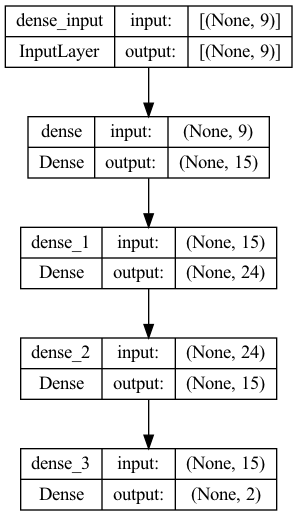

In [4]:
# Create the model
model = Sequential()
model.add(Dense(15, input_dim = 9, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(2, activation='softmax'))
print(model.summary())
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [5]:
# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(feats_train, Y_train, epochs=200, batch_size=40, verbose=1)

Epoch 1/200


2022-12-11 15:23:27.903185: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-11 15:23:28.054503: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 1s 60ms/step - loss: 0.7906 - accuracy: 0.4670
Epoch 2/200
6/6 [==============================] - 0s 10ms/step - loss: 0.7514 - accuracy: 0.4953
Epoch 3/200
6/6 [==============================] - 0s 9ms/step - loss: 0.7177 - accuracy: 0.5330
Epoch 4/200
6/6 [==============================] - 0s 9ms/step - loss: 0.6901 - accuracy: 0.5613
Epoch 5/200
6/6 [==============================] - 0s 12ms/step - loss: 0.6652 - accuracy: 0.5566
Epoch 6/200
6/6 [==============================] - 0s 14ms/step - loss: 0.6431 - accuracy: 0.5943
Epoch 7/200
6/6 [==============================] - 0s 17ms/step - loss: 0.6238 - accuracy: 0.6179
Epoch 8/200
6/6 [==============================] - 0s 15ms/step - loss: 0.6065 - accuracy: 0.6321
Epoch 9/200
6/6 [==============================] - 0s 12ms/step - loss: 0.5901 - accuracy: 0.6840
Epoch 10/200
6/6 [==============================] - 0s 11ms/step - loss: 0.5774 - accuracy: 0.7170
Epoch 11/200
6/6 [===============

In [6]:
test_results = model.evaluate(feats_test,Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

3/3 [==============================] - 0s 19ms/step - loss: 0.4413 - accuracy: 0.8571
Test results - Loss: 0.4413280785083771 - Accuracy: 0.8571428656578064%


2022-12-11 15:23:42.951053: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 7ms/step


2022-12-11 15:23:43.362457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


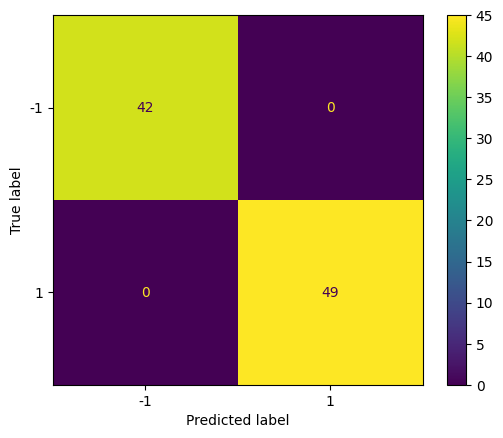

In [7]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

import matplotlib.pyplot as plt

predictions_test = model.predict(feats_test)

binary_predictions_test = []
binay_y_test = []
for item in predictions_test:
    binary_predictions_test.append(int(item[0]<item[1]))
    binay_y_test.append(int(item[0]<item[1]))


cm = confusion_matrix(binay_y_test, binary_predictions_test, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[-1,1])
disp.plot()
disp.im_.set_clim(0, 45)
plt.show()